In [23]:
import csv
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
plt.style.use("fivethirtyeight")

In [52]:
spam_or_ham = pd.read_csv("spam.csv", encoding='latin-1')[["label", "text"]]
spam_or_ham.columns = ["label", "text"]
spam_or_ham.head()


,label,text
0,ham,Dime algo. Esta bien.
1,ham,De acuerdo
2,ham,Mmm. ¿Traigo una botella de vino para entreten...
3,ham,Esta es tu prueba facial (1 2 3 4 5 6 7 8 9 <#...
4,ham,"Oye, iouri me dio tu número, soy Wylie, la ami..."


In [25]:
spam_or_ham["label"].value_counts()

ham     246
spam     46
Name: label, dtype: int64

In [26]:
import string
punctuation = set(string.punctuation)
def tokenize(sentence):
    tokens = []
    for token in sentence.split():
        new_token = []
        for character in token:
            if character not in punctuation:
                new_token.append(character.lower())
        if new_token:
            tokens.append("".join(new_token))
    return tokens

In [45]:
spam_or_ham.head()["label"].apply(tokenize)

0    [ham]
1    [ham]
2    [ham]
3    [ham]
4    [ham]
Name: label, dtype: object

In [28]:
from sklearn.feature_extraction.text import CountVectorizer
demo_vectorizer = CountVectorizer(
    tokenizer = tokenize,
    binary = True
)


In [29]:
from sklearn.model_selection import train_test_split
train_text, test_text, train_labels, test_labels = train_test_split(spam_or_ham["text"], spam_or_ham["label"], stratify=spam_or_ham["label"])
print(f"Training examples: {len(train_text)}, testing examples {len(test_text)}")

Training examples: 219, testing examples 73


In [30]:
real_vectorizer = CountVectorizer(tokenizer = tokenize, binary=True)
train_X = real_vectorizer.fit_transform(train_text)
test_X = real_vectorizer.transform(test_text)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [31]:
from sklearn.svm import LinearSVC
classifier = LinearSVC()
classifier.fit(train_X, train_labels)
LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
)

LinearSVC()

In [32]:
from sklearn.metrics import accuracy_score
predicciones = classifier.predict(test_X)
accuracy = accuracy_score(test_labels, predicciones)
print(f"Accuracy: {accuracy:.4%}")

Accuracy: 98.6301%


In [42]:
frases = [
 '¿Está buscando rediseñar su sitio web con una nueva apariencia moderna?',
 'Por favor envíeme una confirmación de la eliminación completa y permanente de los datos personales',
'Has sido seleccionado para ganar una suscripción GRATUITA a nuestro servicio',
 "Nos comunicamos con usted porque el punto final del webhook asociado con su cuenta en modo de prueba ha fallado",
  'Confirma tu cuenta de Facebook en el siguiente link',
 'Has sido seleccionado para ganar una suscripción GRATUITA a nuestro servicio',

 ]

In [46]:
frases_X = real_vectorizer.transform(frases)
predicciones = classifier.predict(frases_X)

In [90]:
for text, label in zip(frases, predicciones):
  print(f"{label:0} - {text}")

ham - ¿Está buscando rediseñar su sitio web con una nueva apariencia moderna?
ham - Por favor envíeme una confirmación de la eliminación completa y permanente de los datos personales
spam - Has sido seleccionado para ganar una suscripción GRATUITA a nuestro servicio
ham - Nos comunicamos con usted porque el punto final del webhook asociado con su cuenta en modo de prueba ha fallado
ham - Confirma tu cuenta de Facebook en el siguiente link
spam - Has sido seleccionado para ganar una suscripción GRATUITA a nuestro servicio


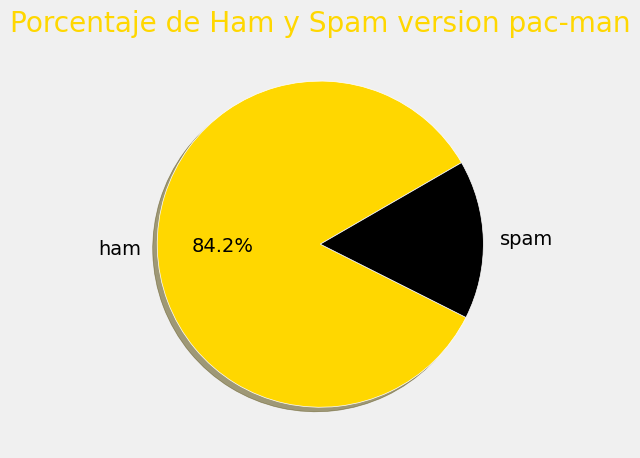

In [117]:
import matplotlib.pyplot as plt

background_color = "#FFD700"

counter = spam_or_ham["label"].value_counts()

plt.pie(counter, labels=counter.index, autopct='%1.1f%%',
        startangle=30, shadow=True, wedgeprops={"edgecolor": "#FFFFFF"},
        colors=[background_color, '#000000'])

plt.title('Porcentaje de Ham y Spam version pac-man', color="#FFFF00")
plt.tight_layout()
plt.show()